In [54]:
import sqlite3

DB_PATH = "/home/tim/eval.db"

con = sqlite3.connect(DB_PATH)
c = con.cursor()
rows = c.execute("SELECT * FROM Runs LEFT JOIN Errors ON Runs.ID=Errors.Run")

validfw = 0
validbw = 0

apps = {}
for row in rows:
    name = row[1]
    
    if name in apps:
        # verify source sink manager 
        app = apps[name]
        eq = row[16] == app["Sources"] and row[17] == app["Sinks"]
        if not eq:
            print("%s differs!" % name)
    elif row[28] == None and row[16] != 0 and row[17] != 0 and row[23] != 0: # do not save exceptions or not started searches
        apps[name] = {}
        app = apps[name]
        app["Sources"] = row[16] 
        app["Sinks"] = row[17]
        app["Classes"] = row[18]
        app["Methods"] = row[19]
        app["Statements"] = row[20]
        app["CGSize"] = row[21]
        app["fw"] = []
        app["bw"] = []
        
    if name in apps:
        if row[6] == None or row[6] == -1:
            continue
        
        app = apps[name]
        runtime = {}
        runtime["IEdges"] = row[22]
        runtime["AEdges"] = row[23]
        runtime["Time"] = row[5]
        runtime["DataflowTime"] = row[6]
        runtime["Leaks"] = row[14]
        runtime["Term"] = row[15]
        if "FastSolverbw" == row[2]:
            app["bw"].append(runtime)
            validfw += 1
        elif "FastSolverfw" == row[2]:
            app["fw"].append(runtime)
            validbw += 1
            
print("Valid Forwards: %s\n Valid Backwards: %s" % (validfw, validbw))

Valid Forwards: 170
 Valid Backwards: 171


Text(0.5, 1.0, 'Backwards')

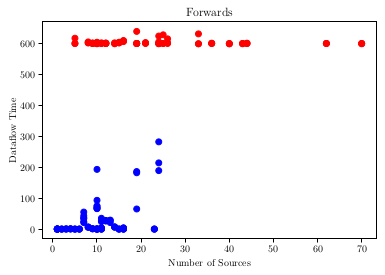

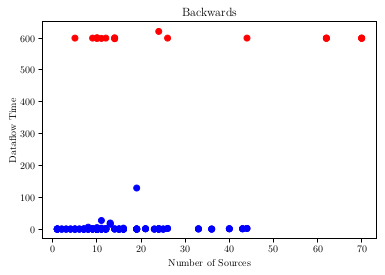

In [47]:
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "lualatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

xfw = []
datafw = []
cfw = []
xbw = []
databw = []
cbw = []
for app in apps.values():
    for run in app["fw"]:
        datafw.append(run["DataflowTime"])
        xfw.append(app["Sources"])
        cfw.append("red") if run["Term"] == 1 else cfw.append("blue")
    for run in app["bw"]:
        databw.append(run["DataflowTime"])
        xbw.append(app["Sources"])
        cbw.append("red") if run["Term"] == 1 else cbw.append("blue")
plt.figure()
plt.scatter(xfw, datafw, c=cfw)
plt.xlabel("Number of Sources")
plt.ylabel("Dataflow Time")
plt.title("Forwards")

plt.figure()
plt.scatter(xbw, databw, c=cbw)
plt.xlabel("Number of Sources")
plt.ylabel("Dataflow Time")
plt.title("Backwards")

Text(0.5, 1.0, 'Backwards')

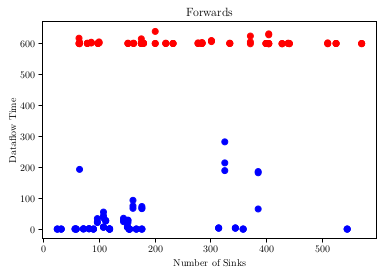

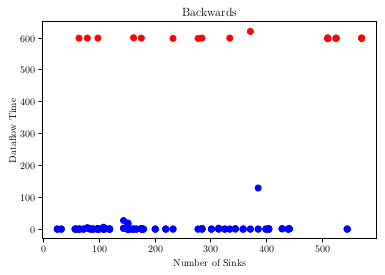

In [46]:
xfw = []
datafw = []
cfw = []
xbw = []
databw = []
cbw = []
for app in apps.values():
    for run in app["fw"]:
        datafw.append(run["DataflowTime"])
        xfw.append(app["Sinks"])
        cfw.append("red") if run["Term"] == 1 else cfw.append("blue")
    for run in app["bw"]:
        databw.append(run["DataflowTime"])
        xbw.append(app["Sinks"])
        cbw.append("red") if run["Term"] == 1 else cbw.append("blue")
plt.figure()
plt.scatter(xfw, datafw, c=cfw)
plt.xlabel("Number of Sinks")
plt.ylabel("Dataflow Time")
plt.title("Forwards")

plt.figure()
plt.scatter(xbw, databw, c=cbw)
plt.xlabel("Number of Sinks")
plt.ylabel("Dataflow Time")
plt.title("Backwards")

57


<BarContainer object of 57 artists>

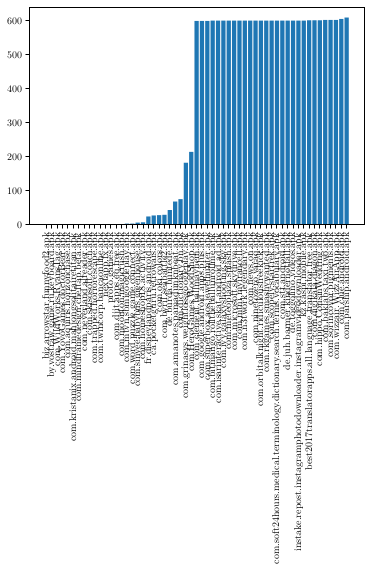

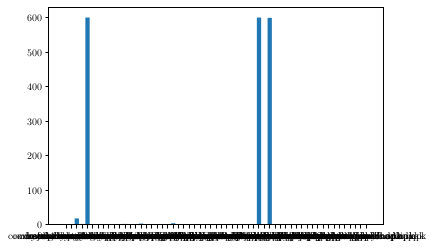

In [61]:
xfw = []
datafw = []
cfw = []
xbw = []
databw = []
cbw = []
for (name, app) in apps.items():
    mid = sorted(app["fw"], key=lambda a: a["DataflowTime"])[len(app["fw"])//2]
    datafw.append(mid["DataflowTime"])
    xfw.append(name)    
    
    mid = sorted(app["bw"], key=lambda a: a["DataflowTime"])[len(app["bw"])//2]
    databw.append(mid["DataflowTime"])
    xbw.append(name)

datafw, xfw = zip(*sorted(zip(datafw, xfw)))
plt.figure()
plt.bar(xfw, datafw)
plt.xticks(xfw, xfw, rotation='vertical')
print(len(xfw))

plt.figure()
plt.bar(xbw, databw)